In [247]:
# http://energiaeambiente.org.br/qualidadedoar

import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

def load_data(file: str):
    return pd.read_csv(file, encoding='ISO-8859-1')

def dataset_visualize_items_specific_columns(dataset, column_name):
    return dataset[column_name].value_counts()

def filter_dataset_by_column(dataset, column_name, item_column):
    return dataset.loc[dataset[column_name] == item_column]

In [248]:
file = '/Users/mtcd/@codes/pollutant forcast/data/sp/2019SP01.csv'
df = load_data(file)
dataset_visualize_items_specific_columns(df, 'Estacao').head()

Marg. Tietê - Pte dos Remédios    41247
Congonhas                         40582
Guarulhos - Pimentas              38853
Cubatão - Vale do Mogi            31855
Cerqueira César                   31808
Name: Estacao, dtype: int64

In [249]:
path = '/Users/mtcd/@codes/pollutant forcast/data/sp'

df_temp = []
lista_arquivos = glob.glob(os.path.join(path,'*.csv'))

for arquivo in lista_arquivos:
    df_temp.append(load_data(arquivo))

df = pd.concat(df_temp, axis=0)
df = filter_dataset_by_column(df, 'Estacao', 'Taubaté')
df = filter_dataset_by_column(df, 'Poluente', 'MP10')
df['DataHora'] = df['Data'] + ',' + df['Hora']
df['DataHora_int'] = df['Data'] + df['Hora']
df['DataHora'] = pd.to_datetime(df['DataHora'], format='%Y-%m-%d,%H:%M')
df = df.drop(columns=['Hora'])
df = df.drop(columns=['Data'])
df.shape

(53695, 8)

In [250]:

df['DataHora_int'] = df['DataHora_int'].astype(str)
df['DataHora_int'] = df['DataHora_int'].apply(lambda x : f'{x[0:4]}{x[5:7]}{x[8:10]}{x[10:12]}{x[13:15]}')
df['DataHora_int'] = df['DataHora_int'].values.astype(int)
df.to_csv('result.csv')
df


,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,DataHora,DataHora_int
716490,Taubaté,SP78,MP10,28.0,ug/m3,automatica,2020-01-01 01:00:00,202001010100
716491,Taubaté,SP78,MP10,49.0,ug/m3,automatica,2020-01-01 02:00:00,202001010200
716492,Taubaté,SP78,MP10,42.0,ug/m3,automatica,2020-01-01 03:00:00,202001010300
716493,Taubaté,SP78,MP10,30.0,ug/m3,automatica,2020-01-01 04:00:00,202001010400
716494,Taubaté,SP78,MP10,19.0,ug/m3,automatica,2020-01-01 05:00:00,202001010500
...,...,...,...,...,...,...,...,...
922757,Taubaté,SP78,MP10,10.0,ug/m3,automatica,2017-12-31 20:00:00,201712312000
922758,Taubaté,SP78,MP10,9.0,ug/m3,automatica,2017-12-31 21:00:00,201712312100
922759,Taubaté,SP78,MP10,9.0,ug/m3,automatica,2017-12-31 22:00:00,201712312200
922760,Taubaté,SP78,MP10,11.0,ug/m3,automatica,2017-12-31 23:00:00,201712312300


In [251]:
df.head(100)

,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,DataHora,DataHora_int
716490,Taubaté,SP78,MP10,28.0,ug/m3,automatica,2020-01-01 01:00:00,202001010100
716491,Taubaté,SP78,MP10,49.0,ug/m3,automatica,2020-01-01 02:00:00,202001010200
716492,Taubaté,SP78,MP10,42.0,ug/m3,automatica,2020-01-01 03:00:00,202001010300
716493,Taubaté,SP78,MP10,30.0,ug/m3,automatica,2020-01-01 04:00:00,202001010400
716494,Taubaté,SP78,MP10,19.0,ug/m3,automatica,2020-01-01 05:00:00,202001010500
...,...,...,...,...,...,...,...,...
716585,Taubaté,SP78,MP10,10.0,ug/m3,automatica,2020-01-04 23:55:00,202001042355
716586,Taubaté,SP78,MP10,8.0,ug/m3,automatica,2020-01-05 01:00:00,202001050100
716587,Taubaté,SP78,MP10,11.0,ug/m3,automatica,2020-01-05 02:00:00,202001050200
716588,Taubaté,SP78,MP10,9.0,ug/m3,automatica,2020-01-05 03:00:00,202001050300


Text(0.5, 1.0, 'Emissão de MP10')

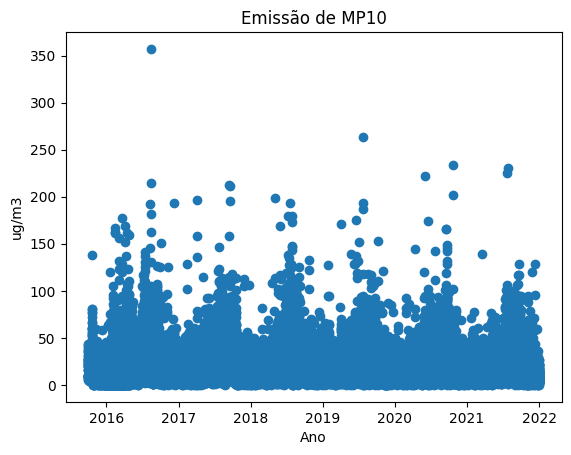

In [252]:
plt.scatter(df['DataHora'], df['Valor'])
plt.xlabel('Ano')
plt.ylabel('ug/m3')
plt.title('Emissão de MP10')

In [253]:
X = df.loc[:,['DataHora_int']]
y = df.loc[:,['Valor']]

In [255]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [256]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()     # Create a scikit learn LinearRegression object
regressor.fit(X_train, y_train) 

LinearRegression()

In [257]:
y_pred = regressor.predict(X_test)

In [258]:
y_pred

array([[20.2450329 ],
       [20.29102903],
       [19.8121558 ],
       ...,
       [22.55809377],
       [20.75150602],
       [20.72372273]])

In [278]:
from sklearn import metrics

print('R^2: ',metrics.r2_score(y_test, y_pred))
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_test, y_pred))
print('MSE (Mean Squared Error):', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2:  0.002055865714385652
MAE (Mean Absolute Error): 11.297429481564684
MSE (Mean Squared Error): 253.73506186523835
RMSE: 15.929063433398662


In [264]:
X_test['DataHora_int'] = pd.to_datetime(X_test['DataHora_int'], format='%Y%m%d%H%M')
X_train['DataHora_int'] = pd.to_datetime(X_train['DataHora_int'], format='%Y%m%d%H%M')

In [267]:
X_test, y_test

(              DataHora_int
 724910 2020-12-17 22:00:00
 717670 2020-02-19 05:00:00
 699683 2021-06-11 16:00:00
 698572 2021-04-25 12:00:00
 717711 2020-02-20 22:00:00
 ...                    ...
 700720 2021-07-24 21:00:00
 719169 2020-04-22 10:00:00
 684591 2015-10-21 09:00:00
 768668 2019-02-26 16:00:00
 773030 2019-08-29 09:00:00
 
 [16109 rows x 1 columns],
         Valor
 724910   19.0
 717670    5.0
 699683   20.0
 698572   26.0
 717711   20.0
 ...       ...
 700720   32.0
 719169   26.0
 684591   45.0
 768668   21.0
 773030   17.0
 
 [16109 rows x 1 columns])

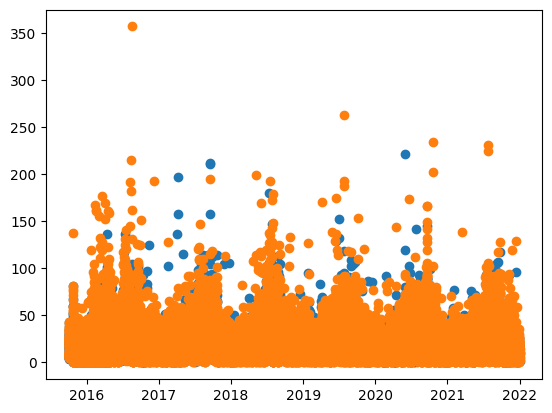

In [279]:
plt.scatter(X_test,y_test)
plt.scatter(X_train,y_train)
